**Parametric versus Non parametric models**

**Parametric** - We estimate parameters from training dataset to learn a function that can classify new data points without requiring original dataset.
*Examples: Perceptron, Logistic regression, linear SVM*

**Non Parametric** - Cannot be characterized by a fixed set of parameters, and number of parameters grows with the training data. *Examples: Decision Tree Classifier/Random Forest, kernel SVM*
- KNN belongs to a sub category of non parametric model that is described as **instance based learning**.
- Models based on instance based learning are characterized by memorizing the training dataset, and lazy learning is a special case of instance based learning that is associated with zero cost during learning process

The simplest ML algorith, KNN consists only of storing the training dataset. Also known as **Lazy learning algorithm**. It is called lazy because it doesnt learn a discriminative function from the training data, **but memorizes the training dataset** instead.

**Summary for KNN**

1. Choose the number k and a distance metric
2. Find the k-nearest neighbors of the sample we want to classify
3. Assign the class label by majority vote. In case of a tie, the scikit-learn  will prefer the neighbors with a closer distance to sample. If similar, it will choose the class label that comes first in the training dataset.

**k-Neighbors clasification** : In its simplest version, the k-NN algorithm onl considers exactly one neighbor, which is the closest training data point to the point the prediction is made for.

In [38]:
import mglearn
import matplotlib.pyplot as plt

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
X, y = mglearn.datasets.make_forge()

C:\Users\prajeeth.nair\Miniconda3\envs\fastai-cpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
print(len(X_train),len(X_test))

19 7


In [23]:
clf = KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
print("Test predictions: {}".format(clf.predict(X_test)))

Test predictions: [1 0 1 0 1 0 0]


In [26]:
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.8571428571428571


In [28]:
from sklearn.datasets import load_breast_cancer

In [30]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state = 66)

In [32]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

In [33]:
for n in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

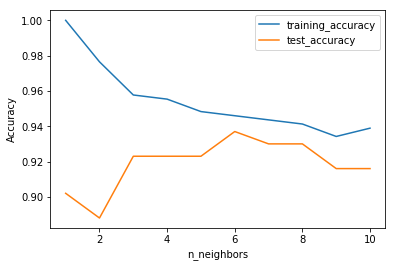

In [40]:
plt.plot(neighbors_settings, training_accuracy, label="training_accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The
worst performance is around 88% accuracy, which might still be acceptable.

**k-Neighbors regression** : 

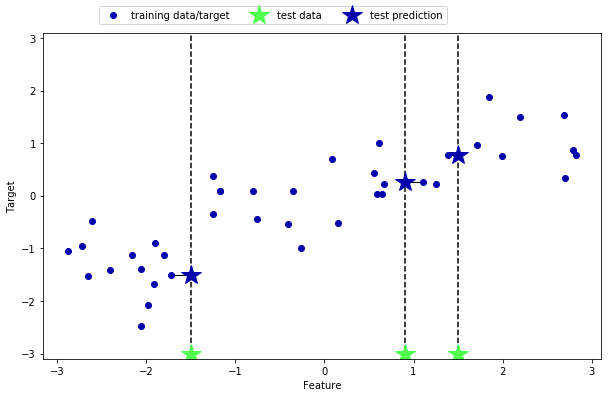

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

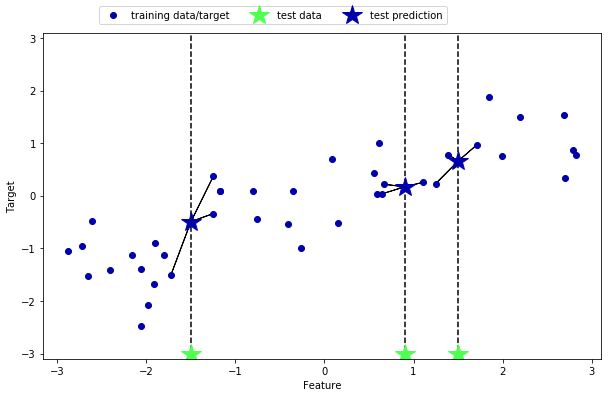

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

The k-nearest neighbors algorithm for regression is implemented in the KNeighborsRegressor class in scikit-learn. It’s used similarly to KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [49]:
?train_test_split

In [50]:
print("Test predictions: {}".format(reg.predict(X_test)))

Test predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


We can also evaluate the model using the score method, which for regressors returns **R2 score**. R2 is also known as *coefficient of determination*. It is a measure of goodness of a prediction for a regression model and yields a score between 0 and 1. The value 1 corresponds to *a perfect prediction* and the value 0 corresponds to *constant model that just predicts the mean of the training response set*

In [51]:
print("Model score: {}".format(reg.score(X_test, y_test)))

Model score: 0.8344172446249604


**Strengths, Parameters and Weakness**

There are two important parameters in KNeighbors classifier : number of neighbors and how you measure the distance between data points

In practice, using a small number of neighbors like three or five often works well, but this needs to be adjusted. For the right distance measure, Euclidean distance works well in many settings. 

When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for   p = 2.

- The model is easy to understand
- Does not require alot of adjustments
- Buiilding the nearest neighbors is fast and works well, but when the training set is large it can be slow
- When using kNN it is important to preprocess your model.
- This approach does not perform well on datasets with many features and does badly with datasets where most features are 0 most of the time (sparse datasets)
- Although easy to understand, it is not considered in practice due to presdiction being slow and inability to handle many features.
- KNN is susceptible to overfitting due to the **curse of dimensionality**. We can think of closest neighbors being too far away in a high dimensional space to give a good estimate

One way to avoid overfitting is **regularization** which is done in models such as logistic regression. In models where Regularization is not applicable, such as Decision trees and KNN, we can use feature selection and dimensionality reduction to help us avoid the *curse of dimensionality*